# 社群媒體分析期末報告：醫護逐字稿之分析
- 第七組
- 組員：M092040020 陳佳伶、M092040013 顏廷諭
- 指導老師：黃三益 教授 & 助教團隊
- 日期：2022/1/18

## 大綱
+ A. 動機和分析目的
+ B. 資料集的描述
+ C. 資料的分析過程、結果與解釋
+ D. 結論
+ E. 參考資料

## A. 動機和分析目的
　　在資訊化的時代，紙本病歷需要革新，
傳統的紙本病歷不僅需要儲存的空間，還要專人負責管理；但是當看診的病患愈來愈多，勢必要有更大的存放空間；因此，電子病歷就成了世界潮流。
電子病歷 (EMR,Electronic Medical Record) 是描述患者疾病狀況或治療過程的重要數據資源。衛生福利部在民國99-101年辦理「加速醫療院所實施電子病歷系統計畫」。每年度持續編列預算推動，以加速醫院實施電子病歷及互通。

　　病歷中的巡房記錄若能適當電子化，將能減輕醫護人員少抄記錄的時間，提升病歷記錄的品質，也能減少因人工手抄時字跡潦草及手寫錯誤的機率。
讓護理人員有較多時間照顧病人，增加品質，也稍微減輕台灣醫療的醫護、病患比例大的壓力。然而，有報導採訪指出:電子病歷每月可以節省1萬多張的紙，粗估一年省下的紙張可以堆成6座101大樓；對於環境也有貢獻。

　　這次與醫電數位轉型股份有限公司的合作案，便以護理部門的非結構化文本資料:逐字稿為出發點，期許利用自然語言處理將逐字稿的文本內容按欄位類別分類，做相關分析。 
  
    本次的分析共有以下三個具體目標:
    
### **一. 針對逐字稿建立主題模型**
最後我們可以針對逐字稿建立主題模型，透過分析逐字稿的內容將護理師在巡房時所紀錄的內容進行分類，可以從中得知那些可能是針對交班表的分類問題是有用的資訊，那些可能是多餘的資訊。

### **二. 透過 pretraind 的醫學 NER model (BiLSTM-CRF) 針對現有的資料進行醫學 NER 的預測:**
因為醫電公司最終的目的是希望將逐字稿轉成制式的交班表格，但是交班表格的每隔內容一般而言都分散在逐字稿的各個部分，因此一個簡單的想法是，我們將交班表格的個別部分都當作是一個類別，並且透過深度模型對逐字稿的內容進行 NER 的識別，然後再將 NER 後的結果重新組成一段句子。 以我們找到的中國的醫學 NER 研究為例，該研究的作者將逐字稿中的內文分成: 治療方式、身體部位、疾病症狀、醫學檢查、疾病實體，等五個實體。並且透過 BiLSTM-CRF model 建立醫學 NER 的判別模型，接著再將逐字稿的內容丟入，最後轉出每個字詞的實體分類。而我們建議醫電公司也可以採用這種方式，首先將制式交班表的每項內容當作是一個類別，再根據再些類別進行訓練，最後將逐字稿丟入模型，進而得到逐字稿的每個部份是屬於哪個類別，進而將相同類別的內容挑出，再組合成一段文字。但由於時間以及資料的限縮，因此我們本次沒有針對以上的想法進行建模，但希望這些想法能夠帶給醫電公司啟發，我們也會將參考的原文與 github 連結附上。

### **三. 透過 bert model 針對護理師的逐字稿對病人是否棘手進行預測**
因為我們發現現有的資料以及時間上沒有辦法針對醫電公司的主要目標進行分析，因此我們想說可以透過現有的資料分析一些有趣的問題，因為護理師有時會把跟病患有關的一些八卦或是抱怨都錄製在逐字稿中，因此我們可以針對這些內容建立 bert 模型進而分類該病患是否是難搞的病患



##  B. 資料集的描述

來自醫電公司提供的護理逐字稿資料中，取用96筆的病歷記錄，以病歷號判斷為獨立一筆記錄，作為分析。
逐字稿內容為醫護人員巡房時，對病患的病歷號、時間，以及測量血壓等狀況的記錄。

以下為分析使用的欄位名稱與來源對照:
+ record_no(病歷號)
+ raw_data(逐字稿內容)
+ process(本次入院經過，來自:對應交班表格)
+ folder_name(資料夾，來自:對應交班表格)
+ file_name(文字檔檔名，來自:對應交班表格)
+ class(自定義:以逐字稿內容判斷是否是棘手的病患，"是"定義成"1"、"否"定義為"0")

### 醫學相關字典
+ 自定義醫學相關字典:Medical_dictionary.txt，收集自網路上醫護、病房、科別等常見用詞。
+ 例如:心臟血管科、皮膚科、胃腸科、一般內科、胸痛、絞痛、發燒、耳鳴、熱水燙傷、內視鏡超音波、HB(血紅素)等。

##  C. 資料的分析過程、結果與解釋
使用方法:
+ BERT(分類)
+ LDA
+ NER

### 載入套件
以下為本次分析會使用到的相關套件，列舉幾個說明。
+ pandas:提供高效能、簡易使用的資料格式與資料處理的函數。
+ jieba:中文斷詞套件
+ re:正規化表達式套件
+ matplotlib:繪圖工具
+ gensim: 主題模型函式庫
+ pyLDAvis: 互動式LDA視覺化套件

In [38]:
import pandas as pd
import jieba
import re
import matplotlib
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pyLDAvis.gensim_models
import numpy as np
from PIL import Image

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #使圖中中文能正常顯示
plt.rcParams['axes.unicode_minus']=False #使負號能夠顯示

In [3]:
# 設定圖的字體大小
font = {'size':14}
matplotlib.rc('font', **font)

In [4]:
# 移除警告語，視覺上比較乾淨
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 資料前處理
根據文字處理基本流程，我們需要將我們的資料進行資料前處理。
+ 資料收集：使用逐字稿、對應交班表格的文本資料。
+ 資料清理：將文本內容轉為正規語句，例如：統一標點符號、去除特定標籤等等。
+ 斷詞、斷句：使用工具區分文章中的句子、詞彙，以便於進行分析。
+ 去除停用字：將與分析無關的詞彙去除，例如：語助詞、連接詞等等，來避免影響後續分析結果。

In [5]:
# 匯入資料
data = pd.read_csv('./raw_data/MedData.csv', encoding='UTF-8')  #編碼問題,用txt打開存成UTF-8

In [6]:
data.head(5)
# data.tail(5)

,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok...,化療結束，醫生建議入院開刀
1,1hr_5,"12,47_1063",720_0020_1041_565740,565740,0,一六三二，林聰，治病號五六五七四零，左邊Femoral fracture的，他就一樣沒事，他...,左邊股骨頸骨折
2,1hr_5,"18,27_1043",720_0759_1043_2153779,2153779,1,好，病歷號二一五三七七九，一六零二，高豪治，診斷是obesity的齁，那目前是NPO中齁，那...,肥胖
3,1hr_8,"08,44_1098",721_1601_1098__no.1026110,1026110,1,病歷號一零二六一一零no十一床，然後他二十一號進來的crocras，有診斷ACS，然後他說胸...,胸痛多天
4,1hr_8,"14,23_1081",721_0754_1081_no.1673425,1673425,0,一四四六，然後林明忠，病歷號碼一六七四，一六七三四二五，好neumonia的，好他就是在咳嗽...,咳嗽有痰發燒兩個月


In [7]:
data.shape

(96, 7)

In [8]:
#移除標點符號等格式用字
data['raw_data'] = data.raw_data.apply(lambda x: re.sub('\n', ',', x))
# data['process_description'] = data.article_content.apply(lambda x: re.sub('[a-zA-Z0-9]+', ',', x))

In [9]:
# data.head(5)
data.tail(5)

,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process
91,1hr_65,"23,40_1694",815_012_1694,998864,0,他是右側ZYGOMA FRACTURE上次住二零，RADIUS FRACTURE，後面FOL...,8/1 滑倒右手骨折入院開刀，因跌倒時右臉部撞到有麻、痛情形，出院後至整形外科回診，醫生建議...
92,1hr_65,"23,40_1694",815_012_1694,2111451,0,打第十八次，一個人，第二天的五FU在上面RUN，RUN二十四，十八個小時，明天打完就要回家，...,大腸癌，做第18次化療
93,1hr_65,"23,40_1694",815_012_1694,832505,0,這是GI BLEEDING的， 他說三天前解血便啦 ，然後就來急診，抽血HB十三，TRANS...,"3天前解血便，急診抽血Hb: 13, Tranasmine iv st後返家，返家陸續仍有解..."
94,1hr_65,"23,40_1694",815_012_1694,2219530,0,他這個是，阿勞，他是在宿舍的時侯跌倒，對，陪病者也是阿勞，他說在宿舍跌倒，左手背痛來，就說第...,在宿含被障礙物絆倒，左手背痛來急診求治，照手X光：左手第二指關節脫臼，醫生建議入院手街
95,1hr_65,"23,40_1694",815_012_1694,2178571,0,這個是右腳CELLULITIS，進來的，他說右腳紅腫兩個月沒有好， 說在家語無倫次，但聽說好...,診斷：右腳cellulitis，右腳紅腫2個月未好，今天開始語無倫次，到急診


In [10]:
# 去除不是中文的字詞、一些符號。保留數字(因有血壓數值等資訊)
def clean(row):
    result = re.sub('[\t]{2,}', '', row)   #[]:一個字符集合。匹配方括號中的任意字符,[\t]僅與空格或製表符匹配。[\t]{2,}:匹配 2 個或更多空格或製表符。
    result = re.sub('#_*', '', result)
    result = re.sub('\\n', '', result)
    result = re.sub('\s{2,}', '', result)
#     result = re.sub('[0-9]', '', result)
#     result = re.sub('[^\u4e00-\u9fa5]+', '', row)
    return result

In [11]:
data['raw_data'] = data.raw_data.apply(clean)
data.head(3)

,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok...,化療結束，醫生建議入院開刀
1,1hr_5,"12,47_1063",720_0020_1041_565740,565740,0,一六三二，林聰，治病號五六五七四零，左邊Femoral fracture的，他就一樣沒事，他...,左邊股骨頸骨折
2,1hr_5,"18,27_1043",720_0759_1043_2153779,2153779,1,好，病歷號二一五三七七九，一六零二，高豪治，診斷是obesity的齁，那目前是NPO中齁，那...,肥胖


### Pie plot : class 比例

In [47]:
data_pie=data.groupby(['class']).size().reset_index(name='class_counts')

In [50]:
data_pie

,class,class_counts
0,0,81
1,1,15


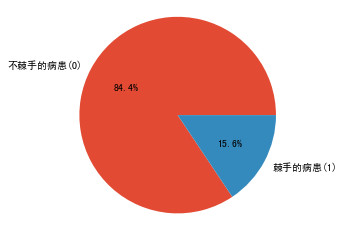

In [51]:
labels='不棘手的病患(0)','棘手的病患(1)'
plt.pie(data_pie['class_counts'] , labels = labels,autopct='%1.1f%%')

plt.axis('equal')
plt.show()

### Jieba中文斷詞、匯入字典

+ 斷詞引擎設定：使用 Jieba 當作斷詞系統。<br>

+ Jieba 原先內建為簡體字字典，因此我們匯入繁體字典，斷詞結果會比較好。<br>

+ 自定義醫學相關字典:Medical_dictionary.txt，收集自網路上醫護、病房等常見用詞。<br>

以下用匯入檔案的方式：

In [12]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
jieba.set_dictionary('./dict/dict.txt') 

# 自定義辭典
print("--> 匯入自定義字典:醫學相關字典")
jieba.load_userdict('./dict/Medical_dictionary.txt')

Building prefix dict from C:\Users\Ling Chen\Documents\social_media_analysis\Final_project\dict\dict.txt ...
Loading model from cache C:\Users\LINGCH~1\AppData\Local\Temp\jieba.ud9d23748fd50a49b3d6fd84a04e63553.cache


--> 匯入自定義字典:醫學相關字典


Loading model cost 0.559 seconds.
Prefix dict has been built successfully.


取資料裡raw_data(逐字稿)，並將文章內容進行斷詞

In [13]:
# 資料進行斷詞，為list的格式
# data = metadata[['artUrl','sentence']]
token_df = data.assign(wordlist = data['raw_data'].apply(jieba.lcut))

print("資料斷詞後的 DataFrame：raw_data(逐字稿)、wordlist(斷詞)")
token_df.head(3)
token_df.tail(3)

資料斷詞後的 DataFrame：raw_data(逐字稿)、wordlist(斷詞)


,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process,wordlist
93,1hr_65,"23,40_1694",815_012_1694,832505,0,這是GI BLEEDING的， 他說三天前解血便啦 ，然後就來急診，抽血HB十三，TRANS...,"3天前解血便，急診抽血Hb: 13, Tranasmine iv st後返家，返家陸續仍有解...","[這是, GI, , BLEEDING, 的, ，, , 他, 說, 三天, 前解, 血..."
94,1hr_65,"23,40_1694",815_012_1694,2219530,0,他這個是，阿勞，他是在宿舍的時侯跌倒，對，陪病者也是阿勞，他說在宿舍跌倒，左手背痛來，就說第...,在宿含被障礙物絆倒，左手背痛來急診求治，照手X光：左手第二指關節脫臼，醫生建議入院手街,"[他, 這個, 是, ，, 阿勞, ，, 他, 是, 在, 宿舍, 的, 時侯, 跌倒, ，..."
95,1hr_65,"23,40_1694",815_012_1694,2178571,0,這個是右腳CELLULITIS，進來的，他說右腳紅腫兩個月沒有好， 說在家語無倫次，但聽說好...,診斷：右腳cellulitis，右腳紅腫2個月未好，今天開始語無倫次，到急診,"[這個, 是, 右腳, CELLULITIS, ，, 進來, 的, ，, 他, 說, 右腳,..."


**去除停用字**

為了提高準確度，我們會將停用字移除，例如：空格、標點符號、語助詞...等。<br>
兩種方式： 1.匯入檔案 2.參數形式手動加入

以下使用匯入檔案的方式：

In [14]:
stopwords = []

#匯入檔案
with open(f'./dict/stopwords.txt','r',encoding='UTF-8') as f:
    stopwords = f.read().splitlines() #移除換行符號\n

print("stropwords儲存為list形式，前幾個為：")
stopwords[:15]

stropwords儲存為list形式，前幾個為：


['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”']

除了移除停用字，也可以設定其他條件。
+ 字的長度要大於一
+ 只選沒有在停用字典裡的字
+ 用正規表達式移除，舉例：\d 移除數字

In [15]:
# 移除停用字的 function
def remove_stop(listt):
    result = [re.sub(r'\d|-', '', word) for word in listt]
    result = [word for word in result if len(word)>1] 
    result = list(filter(lambda x : x not in stopwords, result)) 
    return result

In [16]:
# 讓欄位內容全部顯示
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-16-dc291b6b8e22>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [17]:
# list 刪掉 stopwords
token_df = token_df.assign( remove_stopwords = token_df['wordlist'].apply(remove_stop))
print("remove_stopwords 為 wordlist 移除停用字後的結果：")
token_df.head(3)

remove_stopwords 為 wordlist 移除停用字後的結果：


,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process,wordlist,remove_stopwords
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok，PCA一樣在，vital sign量Q four，其他沒事，KETO沒有要打，就口服藥吃，(?)BAD Q four，其他沒事。,化療結束，醫生建議入院開刀,"[一五一八, ，, 病歷號, 二一四三, 六六, 五, ，, 他, 沒事, ，, 所以, 術後, 你, 也, 知道, 嗎, ，, 就, 正常, 吃, ，, 就, 那個, (, ?, ), ，, 血壓, ok, ，, PCA, 一樣, 在, ，, vital, , sign, 量, Q, , four, ，, 其, 他, 沒事, ，, K, ET, O, 沒有, 要, 打, ，, 就, 口服藥, 吃, ，, (, ?, ), BAD, , Q, , four, ，, 其, 他, 沒事, 。]","[一五一八, 病歷號, 二一四三, 六六, 沒事, 術後, 正常, 血壓, ok, PCA, vital, sign, four, 沒事, ET, 口服藥, BAD, four, 沒事]"
1,1hr_5,"12,47_1063",720_0020_1041_565740,565740,0,一六三二，林聰，治病號五六五七四零，左邊Femoral fracture的，他就一樣沒事，他今天就可以用walker下來了，是ok的，然後cath一樣是右下臂，沒有新的抽血deta，然後就一樣口服藥吃，然後vital sign就BID，然後冰枕一樣是愛冰不冰啦，就這樣。,左邊股骨頸骨折,"[一六三二, ，, 林聰, ，, 治病號, 五六五七四零, ，, 左邊, Femoral, , fracture, 的, ，, 他, 就, 一樣, 沒事, ，, 他, 今天, 就, 可以, 用, walker, 下來, 了, ，, 是, ok, 的, ，, 然後, cath, 一樣, 是, 右下, 臂, ，, 沒有, 新, 的, 抽血, deta, ，, 然後, 就, 一樣, 口服藥, 吃, ，, 然後, vital, , sign, 就, BID, ，, 然後, 冰枕, 一樣, 是, 愛冰, 不冰, 啦, ，, 就, 這樣, 。]","[一六三二, 林聰, 治病號, 五六五七四零, 左邊, Femoral, fracture, 沒事, walker, 下來, ok, cath, 右下, 抽血, deta, 口服藥, vital, sign, BID, 冰枕, 愛冰, 不冰]"
2,1hr_5,"18,27_1043",720_0759_1043_2153779,2153779,1,好，病歷號二一五三七七九，一六零二，高豪治，診斷是obesity的齁，那目前是NPO中齁，那肚子的話就是五個傷口齁，那scope傷口乾淨的素淨齁，目前open care，然後我們班最後一次vital sign的話，體溫三六八，heart rate七十五，呼吸十八，血壓一三四七二，然後cath一樣左下臂那支二十號，然後十四號的foley，他一直complain說想要拔，那有跟他說等今天等等VS來看過齁，然後他的話我們早上血糖是一九零，所以沒打到齁，然後我跟你說二之一還沒接上去喔齁，那在那邊，然後那個我今天想接可是我覺得他老婆這樣會會又調點滴，就是一種你知道之前開過然後在那邊，齁vital sign Q六齁，finger Q六，然後他(?)已經排氣了齁，那我跟他說跟今天再跟醫生說齁，然後飲食衛教，如果他可以喝水的話再幫他call營養師，有，睡前睡前有打。,肥胖,"[好, ，, 病歷號, 二一五三, 七七, 九, ，, 一六, 零二, ，, 高豪治, ，, 診斷, 是, obesity, 的, 齁, ，, 那, 目前, 是, NPO, 中, 齁, ，, 那, 肚子, 的, 話, 就是, 五個, 傷口, 齁, ，, 那, scope, 傷口, 乾淨, 的, 素淨, 齁, ，, 目前, open, , care, ，, 然後, 我們, 班, 最後, 一次, vital, , sign, 的, 話, ，, 體溫, 三六八, ，, heart, , rate, 七十五, ，, 呼吸, 十八, ，, 血壓, 一三四七二, ，, 然後, cath, 一樣, 左下, 臂, 那, 支二十號, ，, 然後, 十四號, 的, foley, ，, 他, 一直, complain, 說, 想要, 拔, ，, 那有, 跟, 他, 說, 等, 今天, 等等, VS, ...]","[病歷號, 二一五三, 七七, 一六, 零二, 高豪治, 診斷, obesity, 目前, NPO, 肚子, 五個, 傷口, scope, 傷口, 乾淨, 素淨, 目前, open, care, 最後, 一次, vital, sign, 體溫, 三六八, heart, rate, 七十五, 呼吸, 十八, 血壓, 一三四七二, cath, 左下, 支二十號, 十四號, foley, 一直, complain, 想要, 那有, VS, 看過, 早上, 血糖, 一九零, 打到, 一還, 接上, 想接, 老婆, 會會, 點滴, 一種, 開過, vital, sign, finger, 排氣, 醫生, 飲食, 衛教, 喝水, call, 營養師, 睡前, 睡前]"


In [18]:
# 將remove_stopwords欄位展開 (已移除停用字後的結果)
data_token = token_df.explode('remove_stopwords') 

In [19]:
data_token.head(3)

,parent_folder_name,folder_name,file_name,record_no,class,raw_data,process,wordlist,remove_stopwords
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok，PCA一樣在，vital sign量Q four，其他沒事，KETO沒有要打，就口服藥吃，(?)BAD Q four，其他沒事。,化療結束，醫生建議入院開刀,"[一五一八, ，, 病歷號, 二一四三, 六六, 五, ，, 他, 沒事, ，, 所以, 術後, 你, 也, 知道, 嗎, ，, 就, 正常, 吃, ，, 就, 那個, (, ?, ), ，, 血壓, ok, ，, PCA, 一樣, 在, ，, vital, , sign, 量, Q, , four, ，, 其, 他, 沒事, ，, K, ET, O, 沒有, 要, 打, ，, 就, 口服藥, 吃, ，, (, ?, ), BAD, , Q, , four, ，, 其, 他, 沒事, 。]",一五一八
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok，PCA一樣在，vital sign量Q four，其他沒事，KETO沒有要打，就口服藥吃，(?)BAD Q four，其他沒事。,化療結束，醫生建議入院開刀,"[一五一八, ，, 病歷號, 二一四三, 六六, 五, ，, 他, 沒事, ，, 所以, 術後, 你, 也, 知道, 嗎, ，, 就, 正常, 吃, ，, 就, 那個, (, ?, ), ，, 血壓, ok, ，, PCA, 一樣, 在, ，, vital, , sign, 量, Q, , four, ，, 其, 他, 沒事, ，, K, ET, O, 沒有, 要, 打, ，, 就, 口服藥, 吃, ，, (, ?, ), BAD, , Q, , four, ，, 其, 他, 沒事, 。]",病歷號
0,1hr_5,"12,47_991",715_0755_991_2143665,2143665,0,一五一八，病歷號二一四三六六五，他沒事，所以術後你也知道嗎，就正常吃，就那個(?)，血壓ok，PCA一樣在，vital sign量Q four，其他沒事，KETO沒有要打，就口服藥吃，(?)BAD Q four，其他沒事。,化療結束，醫生建議入院開刀,"[一五一八, ，, 病歷號, 二一四三, 六六, 五, ，, 他, 沒事, ，, 所以, 術後, 你, 也, 知道, 嗎, ，, 就, 正常, 吃, ，, 就, 那個, (, ?, ), ，, 血壓, ok, ，, PCA, 一樣, 在, ，, vital, , sign, 量, Q, , four, ，, 其, 他, 沒事, ，, K, ET, O, 沒有, 要, 打, ，, 就, 口服藥, 吃, ，, (, ?, ), BAD, , Q, , four, ，, 其, 他, 沒事, 。]",二一四三


In [20]:
data_token.groupby(['parent_folder_name','remove_stopwords']).size().reset_index(name='counts')

,parent_folder_name,remove_stopwords,counts
0,1hr_13,APN,1
1,1hr_13,Acute,1
2,1hr_13,BID,1
3,1hr_13,Bilirubin,1
4,1hr_13,CT,1
5,1hr_13,Computed,1
6,1hr_13,Flumarin,2
7,1hr_13,GI,1
8,1hr_13,GYN,2
9,1hr_13,Gastro,1


In [21]:
#計算不同字的詞頻
# data_token.groupby(['parent_folder_name','remove_stopwords']).size().reset_index(name='counts')
word_count = data_token.groupby(['remove_stopwords']).size().reset_index(name='size')
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
word_count.head(10)

,remove_stopwords,size
2012,沒事,57
701,sign,53
1512,回家,53
734,vital,47
1802,抽血,47
193,HB,47
2408,血壓,44
984,不用,43
1266,八月,41
1001,之後,40


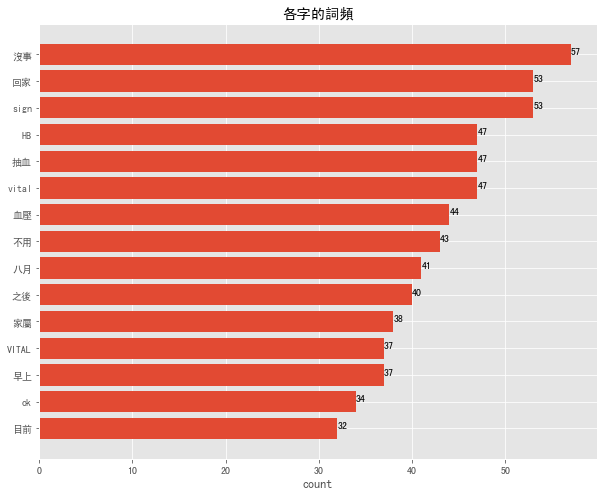

In [22]:
word_sum = word_count.head(15).sort_values(by=['size'])

plt.figure(figsize=(10,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

# plt.subplot(121)
plt.title('各字的詞頻')
plt.xlabel('count')
# plt.xlim(0,60000)
plt.barh(word_sum['remove_stopwords'],word_sum['size'])   #,color="darkblue" / color="black"
for wi, si in zip(word_sum['remove_stopwords'], word_sum['size']):
    plt.text(si, wi, "{}".format(si))

plt.show()

##  LDA 主題模型

Latent Dirichlet allocation 簡稱 LDA，是一種主題模型，他可以將資料集中每篇文檔的主題按照機率分佈，他是無監督學習法，訓練時不需要手動標註，只需要給文檔集、主題數，也可以根據一些參數(alpha、Beta)來改變模型訓練的結果，以下使用 gensim 套件來示範如何訓練 LDA 模型。

**訓練 LDA 模型**

將文章斷詞結果儲存為 list 資料形態，一篇文章為一個 list ，其中 element 為詞彙。

In [23]:
token_data = token_df['remove_stopwords'].tolist()

In [24]:
for i in range(0,3):
    print("第 " + str(i+1) + " 篇文章前5個字：")
    for j in range(0,5):
        print(token_data[i][j], end=' ')
    print('\n')

第 1 篇文章前5個字：
一五一八 病歷號 二一四三 六六 沒事 

第 2 篇文章前5個字：
一六三二 林聰 治病號 五六五七四零 左邊 

第 3 篇文章前5個字：
病歷號 二一五三 七七 一六 零二 



id2word 將斷詞結果生成字典，裡頭為資料集出現的字。

In [25]:
id2word = corpora.Dictionary(token_data)
print('資料集字典：')
print(id2word)

資料集字典：
Dictionary(2783 unique tokens: ['BAD', 'ET', 'PCA', 'four', 'ok']...)


將斷詞結果建構語料庫(corpus)，利用語料庫把每篇文章數字化。<br>
每篇文章、每個詞彙都被賦予一個 ID 及頻率(word_id，word_frequency)。<br>

舉例來說：<br>
第一篇文章數字化結果為：corpus[0]:[(0, 1), (1, 1), (2, 3), .... ]，element 為文章中每個詞彙的 id 和頻率。<br>
代表：'COVID-'出現一次'、'一再'出現一次、'一同'出現三次...以此類推

In [26]:
corpus = [id2word.doc2bow(text) for text in token_data]
print('第一篇文章 corpus :')
print(corpus[0][:10])

第一篇文章 corpus :
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


參數說明：
+ corpus = 文檔語料庫
+ id2word = 詞彙字典
+ num_topics = 生成幾個主題數
+ random_state = 固定亂數值，每次的模型結果會一樣
+ iteration = 每個文章訓練的次數，可以設定高一點讓模型收斂(時間也會增加)
+ passes(epoch) = 整個 corpus 訓練模型的次數

## 使用LDA(k=3)找出主題，並列出每個主題最重要的前5個字

In [27]:
ldamodel = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus, 
    id2word=id2word, # 字典
    num_topics=3, # 生成幾個主題數
    random_state=2021, # 亂數
    iterations = 1000,
    passes=5, # 模型訓練次數
)

### 列出每個主題最重要的前5個字

In [28]:
# 每個主題重要的前五個關鍵字
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.007*"HB" + 0.007*"ok" + 0.007*"sign" + 0.005*"早上" + 0.005*"vital"')
(1, '0.009*"血壓" + 0.005*"HB" + 0.005*"下來" + 0.005*"不用" + 0.004*"目前"')
(2, '0.009*"沒事" + 0.008*"回家" + 0.007*"家屬" + 0.006*"sign" + 0.006*"vital"')


### 說明
我們根據每個主題的詞彙分佈來推測，該主題可能與哪些議題相關：
+ 主題一：出現最多"沒事"、回家"、"家屬"的主題
+ 主題二：HB(血色素)、抽血、PCA(病人術後自控式止痛)等巡房常見基本用詞
+ 主題三：血壓、HB(血色素)等生命徵象基本數值的主題

其他解讀
+ 最常出現"沒事"，應該多指血壓等數值都正常。這一批逐字稿資料的病患狀況較正常，沒有看見病情較嚴重的病患。
+ 在主題二出現的"三八"，不是一般口語談話對人的形容詞，而在醫護的逐字稿指的是"體溫"。

## 存成LDAvis格式,看主題分類的結果

In [29]:
ldaVis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(ldaVis,'./lda_result/ldaVis.html')

C:\Users\Ling Chen\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### LDA 模型指標
+ **Pairwise Pointwise Mutual Information** : <br>
自然語言處理中，想要探討兩個字之間是否存在某種關係。<br>
例如：某些字會一起出現，可能帶有某些訊息，因此這個可以用 PMI 來計算，數字越大越好。
+ **perplexity** :<br>
perplexity 也是評估的指標之一，廣泛用於語言模型的評估，意思為複雜度，因此數字要越小越好。(資訊理論中，perplexity越低則契合越準確。該度量可以用於比較不同模型之優劣。)

In [30]:
PMI_model_lda = CoherenceModel(model=ldamodel, texts=token_data, coherence='c_uci')
PMI_lda = PMI_model_lda.get_coherence()
print('這個主題的 PMI score: ', PMI_lda)

這個主題的 PMI score:  -6.563843200908576


In [31]:
perplexity = ldamodel.log_perplexity(corpus)
print('這個主題的 Perplexity Score: ', perplexity)

這個主題的 Perplexity Score:  -7.662364921476261


**透過指標找出最佳主題數**

透過建立不同主題數的模型，並以上述所說的**判斷指標**來找出最佳的主題數。<br>
這裡以 perplexity 為指標，因為gensim套件的問題，我們將其進行轉換。<br>

In [32]:
topic_num_list = np.arange(2, 10, 2)  #k=2,4,6,8
result = []
for topic_num in topic_num_list:
    # perplexity
    tmp_ldamodel = gensim.models.ldamulticore.LdaMulticore(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=id2word,
        random_state = 2021,
        passes=5,
        iterations=1000
        )
    tmp_perplexity = tmp_ldamodel.log_perplexity(corpus)
    temp_skleran = np.exp(-1. * tmp_perplexity)  #注意:gensim的perplexity算式(tmp_perplexity)需要轉換
    
    result.append({"topic_num": topic_num, "gensim_perplexity": tmp_perplexity, "perplexity":temp_skleran})

,topic_num,gensim_perplexity,perplexity
0,2,-7.630313,2059.693834
1,4,-7.675899,2155.761070
2,6,-7.694218,2195.616937
3,8,-7.710225,2231.043250


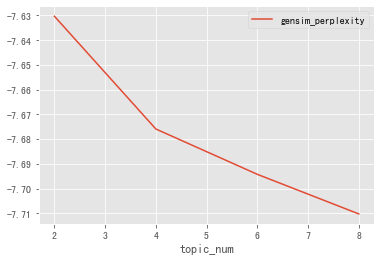

In [33]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='gensim_perplexity', label='gensim_perplexity')
result

,topic_num,gensim_perplexity,perplexity
0,2,-7.630313,2059.693834
1,4,-7.675899,2155.761070
2,6,-7.694218,2195.616937
3,8,-7.710225,2231.043250


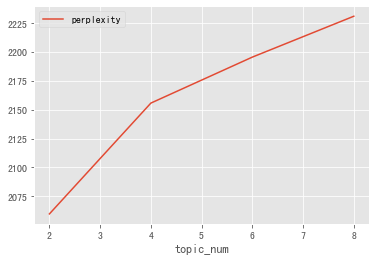

In [34]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='perplexity', label='perplexity')
result

### 說明
由上圖可以看出：當主題數為2的perplexity最小。

perplexity越小，對語言模型的評估較好。因此，找出最佳的主題數：2。

### 產生 LDAvis 結果
以下用**主題數 2** 來做 LDAvis 的結果和解釋

In [35]:
#生成模型 
ldamodel2 = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus, 
    id2word=id2word, # 字典
    num_topics=2, # 生成幾個主題數
    random_state=2021, # 亂數
    iterations = 1000,
    passes=5, # 模型訓練次數
)

In [36]:
ldaVis2 = pyLDAvis.gensim_models.prepare(ldamodel2, corpus, dictionary=ldamodel2.id2word)
pyLDAvis.save_html(ldaVis2,'./lda_result/ldaVis2.html')

C:\Users\Ling Chen\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### 說明
我們根據每個主題的詞彙分佈來推測，該主題可能與哪些議題相關：
+ 主題一：出現最多"回家"、"出院"、"沒事"的主題
+ 主題二：HB(血色素)、Vital signs(生命徵象)、CATH(心導管檢查)等巡房或檢查常見基本用詞

主題一的結果

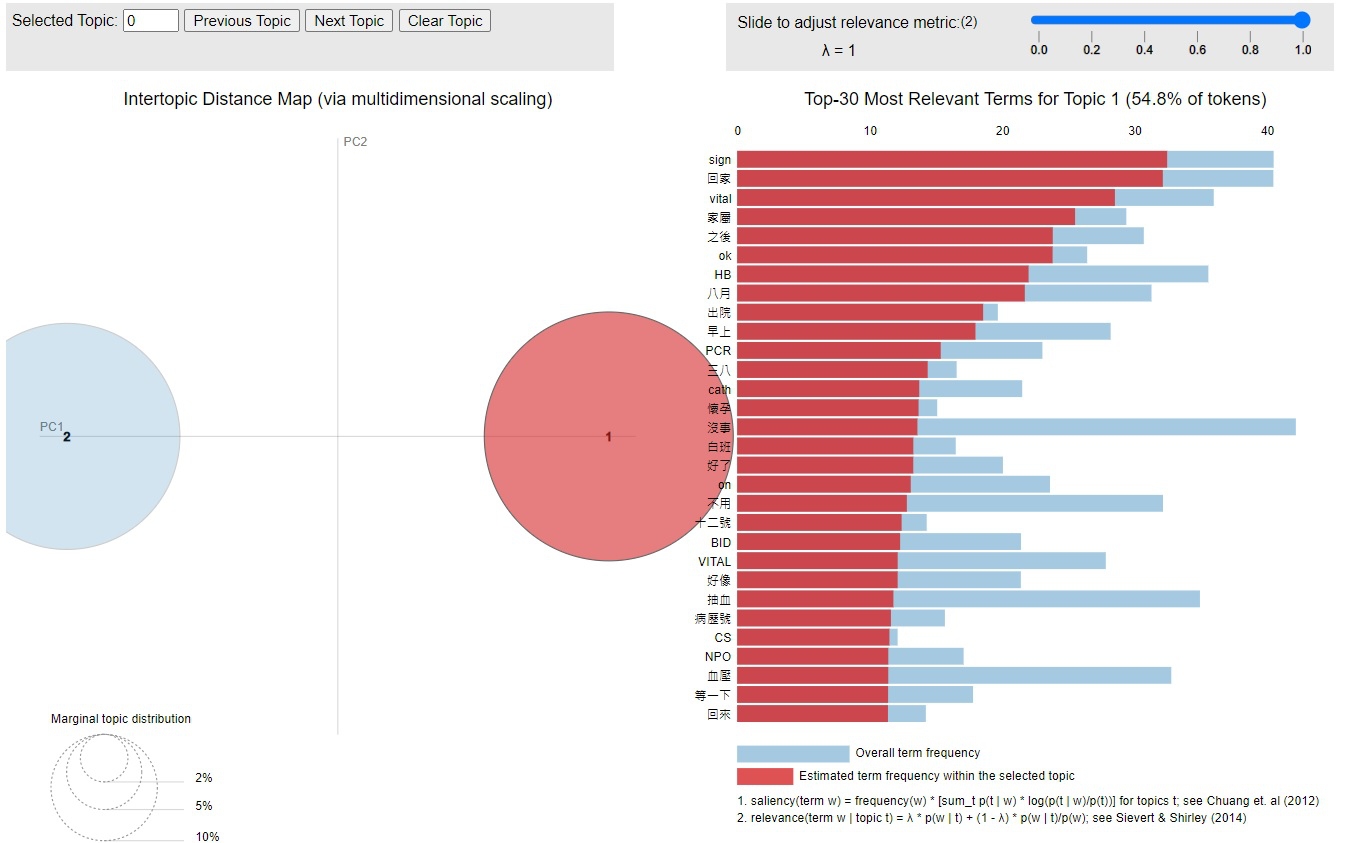

In [40]:
Image.open("LDA1.jpg")

主題二的結果

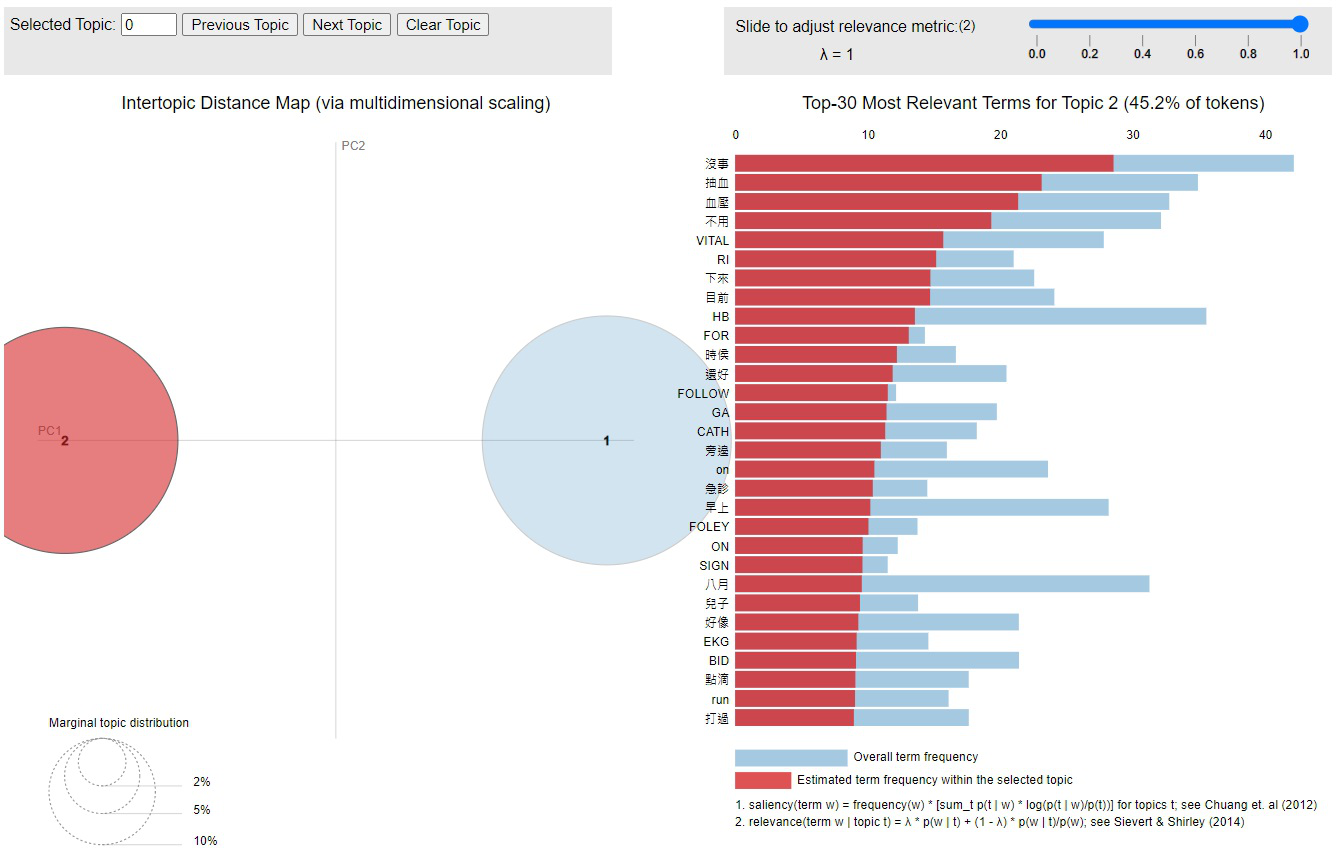

In [41]:
Image.open("LDA2.jpg")

## D. 結論
### LDA
以逐字稿做出的主題模型，依據LDA模型指標perplexity，找到最佳的主題數:2，其結果如下:
+ 主題一：出現最多"回家"、"出院"、"沒事"的主題
+ 主題二：HB(血色素)、Vital signs(生命徵象)、CATH(心導管檢查)等巡房或檢查常見基本用詞

在分析的過程中，我們嘗試過設定主題數為3、4，分出的主題結果較不明顯，主題間會出現重複的詞彙，這是因為大多是醫護人員巡房常見的用詞，會檢查到的項目:HB(血紅素)、血壓等。另外，因大多數病患狀況較為穩定，所以常會提到何時出院、"沒事"等詞彙。

逐字稿中較多口語用詞，或許可以訂出一些口頭記錄的規則，例如:念出"血壓"，接著再說數值多少，應該能幫助後續分析:交班表格的欄位分類。

### 醫學 NER
1. 逐字稿太長，且太多不必要的冗言贅字，導致 pretrained NER model 沒有辦法準確地辨識出各別的 NER 
2. 當我們將入院經過的內容丟入 NER model 時可以得到滿好的分類結果。

### Bert 難搞棘手分類
train 跟 validation 的 acc 在訓練的過程中發生overfitting 最可能的關鍵因素在於資料量太少，但由 training 的訓練結果可以證實一件事情，就是我們這樣分類問題是可以實作的，當然可以更細緻地去探究模型究竟是看到了那些字句判別這個病患是否棘手。

## E. 參考資料

+ 電子病歷的介紹
http://www.daanhosp.com.tw/web/Emr/emr_2.html

+ 衛生福利部資訊處
https://dep.mohw.gov.tw/DOIM/cp-922-1247-114.html

+ 英中常用醫學和癌症詞彙
https://heartofhopehospice.org/hospice/pdf/books/Bilingual_Medical_and_Cancer_Vocabulary.pdf

+ 婦產科常見診斷及縮寫
https://nursing.nutc.edu.tw/ezfiles/22/1022/img/1846/493279939.pdf

+ 基於BiLSTM+CRF醫學病例命名實體識別項目 : 
https://www.gushiciku.cn/pl/gz21/zh-tw

+ 基於BiLSTM+CRF醫學病例命名實體識別項目(Git hub): 
https://github.com/liuhuanyong/MedicalNamedEntityRecognition (2021-01-06 )
